# Bivariate Analysis with Seaborn

During bivariate analysis we take 2 variables and attempt to determine the empirical relationship between them. 

Firstly, we import necessary libraries and load penguins dataset as 'penguins'.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
penguins = sns.load_dataset('penguins')

In [27]:
# Take a look at the first5 rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


This notebook is divided to 2 parts, whereby the first one involves creating various bivariate plots of categorical and numerical variables. In the second one we´ll look at the relationship between only numerical variables. 

## Categorical variables

If you want to visualize data involving categorical variable, you can choose between 2 approaches: 

a) `catplot()` plotting function 

- this is Figure-level interface that allows you to plot categories
- by calling this function, `a stripplot` will be drawn by default
  
Important note: specifying data

- data you want to visualize must passed in a long-form DataFrame 
- categorical and numerical variable must be passed as strings to `x` and `y` parameters in the following way:   
  ```sns.catplot(data = dataset, x = 'categorical_variable', y = 'numerical_variable')```
  

- the below code won´t work:  
  ```sns.catplot(x = data['categorical_variable'], y = data['numerical_variable'])```
  
`catplot()` functions provides us the access to other axes-level plotting functions, that you can select by passing respective plot kind to `kind` parameter:

- "box", "swarm", "strip", "violin", "barplot", etc. 
  

b) axes-level plotting functions
 **dopisat**
 
It´s up to you what approach better suits you.


### Boxplot

Let´s look at species of penguins and how they differ based on their weight.

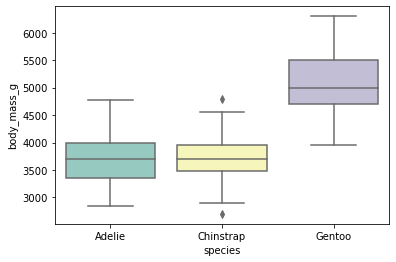

In [57]:
# Boxplots of body mass of penguins based on the species
sns.boxplot(data = penguins, x = 'species', y = 'body_mass_g', palette = 'Set3');

Visualization of the distribution reveals us interesting differences and similarities among species. For Adelie and Chinstrap, the majority of penguins do weigh up to approximately 4000 grams, although Chinstrap weight range is smaller than Adelie penguins. These two species have also the same median value of 3700 grams. In case of Chanstrap penguins, there are present outliers, which can indicate that some penguins weight differently less or more compared to the rest of observations. Gentoo penguins are overally heavier, while the vast majority of penguins have weight about 4700-5500 grams. this species has the highest range of recorded values.  

In [70]:
# Median values of Adelie and Chinstrap species
print('Adelie body mass-median value: ', penguins[penguins.species == 'Adelie'].body_mass_g.median(),
      '\n'
      'Chinstrap body mass-median value: ', penguins[penguins.species == 'Chinstrap'].body_mass_g.median())

Adelie body mass-median value:  3700.0 
Chinstrap body mass-median value:  3700.0


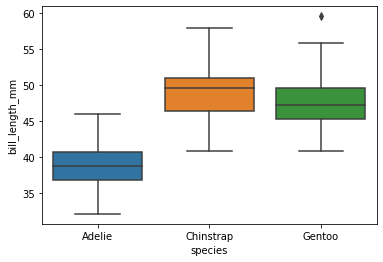

In [10]:
# Boxplots of the bill length based on the species
sns.boxplot(data = penguins, x = 'species', y = 'bill_length_mm');

From the boxplots we can say, that Adelie species is characteristic with the shortest length of the bill, while the most penguins have about 37-41 milimeters long bill. The bill length of Chinstrap and Gentoo species is from about 41 mm. If we do not take into account the outlier of Gentoo species, this species have shorter bills compared to Chinstrap penguins.

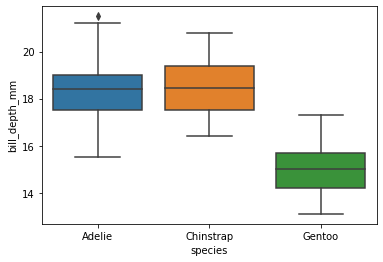

In [12]:
# TASK 1 >>> Create a boxplots of the depth of the bills based on species
sns.boxplot(data = penguins, x = 'species', y = 'bill_depth_mm');

> What can you say about those 3 species in term of the bill depth? How does the distribution differ ? What about the range of values? What species has the shortest bills?

### Swarmplot

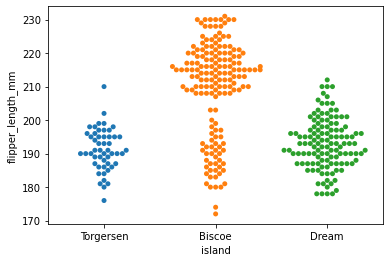

In [139]:
# Swarmplot of the flipper length based on islands
sns.swarmplot(data = penguins, x = 'island', y = 'flipper_length_mm');

Now we see the distribution of penguins´s flipper length on three islands, but this plot does not provide us any specific and useful information. We can say only, for example, there are penguins with either really short flippers or vast majority of penguins have long flippers about 215 milimeters on Biscoe island. 

Let´s explore what species are actually present on particular islands.

In [111]:
# Group data based on island and count penguins
penguins.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: species, dtype: int64

Interesting, Adelie species inhabit all three islands. Gentoo penguins are present only in Biscoe island and Chinstrap´s home is Dream island. Let´s filter the dataset only for Gentoo and Chinstrap penguins.

Filtering approach is up to you. You can create a subset of a DataFrame with specific rows based on a condition using indexing like in this example:   
```subset = data['weight'] == 85```

This operation checks for whether the row contain value 85 and returns only those rows where this condition is fulfilled.

**dopisat**

Another option is to used  `query` which we apply onto the DataFrame and I find it more straightforward. We specify that, we want to filter only those rows, where Gentoo and Chinstrap penguins are present as species. Since we filter for more than 1 condition, these species must by passed as a list. We use `in` keyword, which check whether a species is present in the list.


Choose a approach which the best suits you. I included both of them for comparing the code syntax.

In [149]:
# Filter only Gentoo and Chinstrap species
penguins_filter = penguins.query('species in ["Gentoo","Chinstrap"]')

In [146]:
penguins_fil = penguins[penguins['species'].isin(["Gentoo","Chinstrap"])]

In [151]:
penguins_fil

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


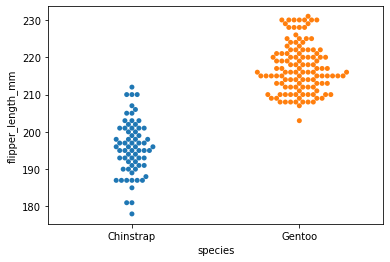

In [148]:
sns.swarmplot(data = penguins_fil, x = 'species', y = 'flipper_length_mm');

In [128]:
# The new DataFrame penguins_filter will be returned as an output
penguins_filter

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Now we recreate a swarmplot passing DataFrame penguins_filter as input data.

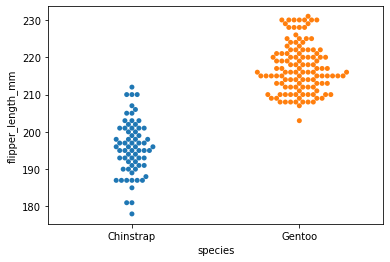

In [129]:
# Swarmplot of the flipper length on Biscoe and Dream islands
sns.swarmplot(data = penguins_filter, x = 'species', y = 'flipper_length_mm');

In [131]:
# TASK 2 >>> Now try to filter only Adelie species and save it as adelie_filter
#        >>> You can again query penguins DataFrame as we did before
# 
adelie_filter = penguins.query('species == "Adelie"')

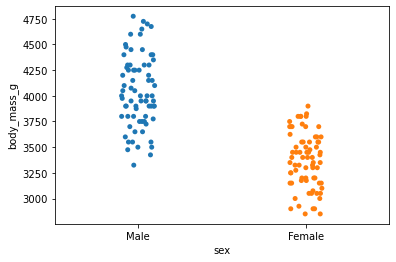

In [137]:
sns.stripplot(data = adelie_filter, x = 'sex', y = 'body_mass_g');

### Violinplot

Violin plots have many of the same summary statistics as box plots:

- the white dot represents the median
- the thick gray bar in the center represents the interquartile range
- the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.

On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

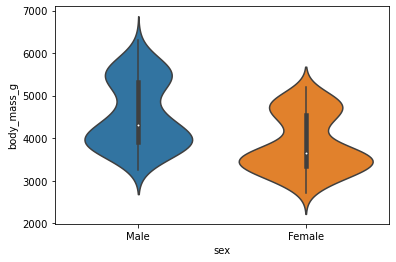

In [156]:
sns.violinplot(data = penguins, x = 'sex', y = 'body_mass_g');

## Numerical variables

### Relplot



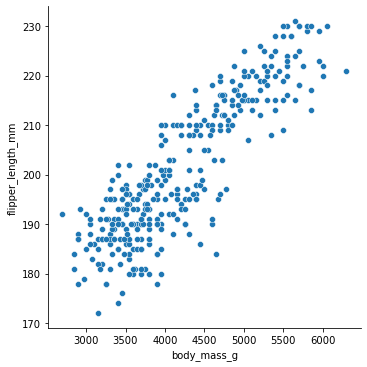

In [23]:
sns.relplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm')

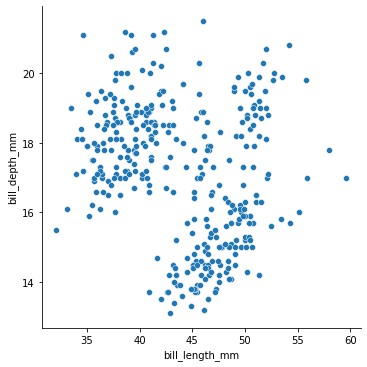

In [154]:
# TASK >>>
sns.relplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm')

### Scatterplot

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

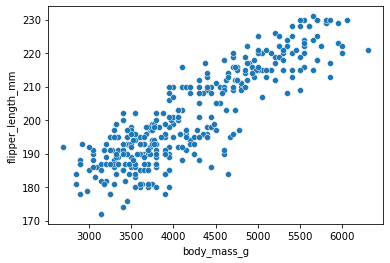

In [24]:
sns.scatterplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm')

### Lmplot

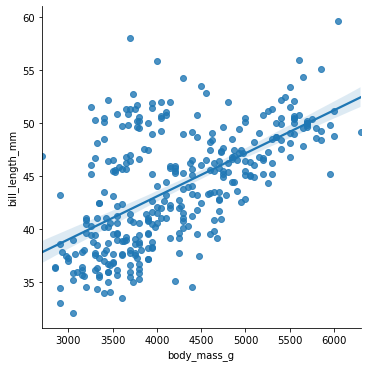

In [26]:
sns.lmplot(data = penguins, x = 'body_mass_g', y = 'bill_length_mm')